# 环境安装
```python
pip3 install torch torchvision torchaudio
# cuda 安装

pip install transformers datasets evaluate peft accelerate gradio optimum sentencepiece
pip install jupyterlab scikit-learn pandas matplotlib tensorboard nltk rouge
```

# 什么是Pipeline?
> 字面意义是管道的意思,学过linux命令的朋友都知道管道的作用就是组装

+ 将数据预处理、模型调用、调用后处理三部分组装流水线
  
(1)预处理 (preprocessing)，将原始文本转换为模型可以接受的输入格式；
(2)将处理好的输入送入模型；
(3)对模型的输出进行后处理 (postprocessing)，将其转换为人类方便阅读的格式。

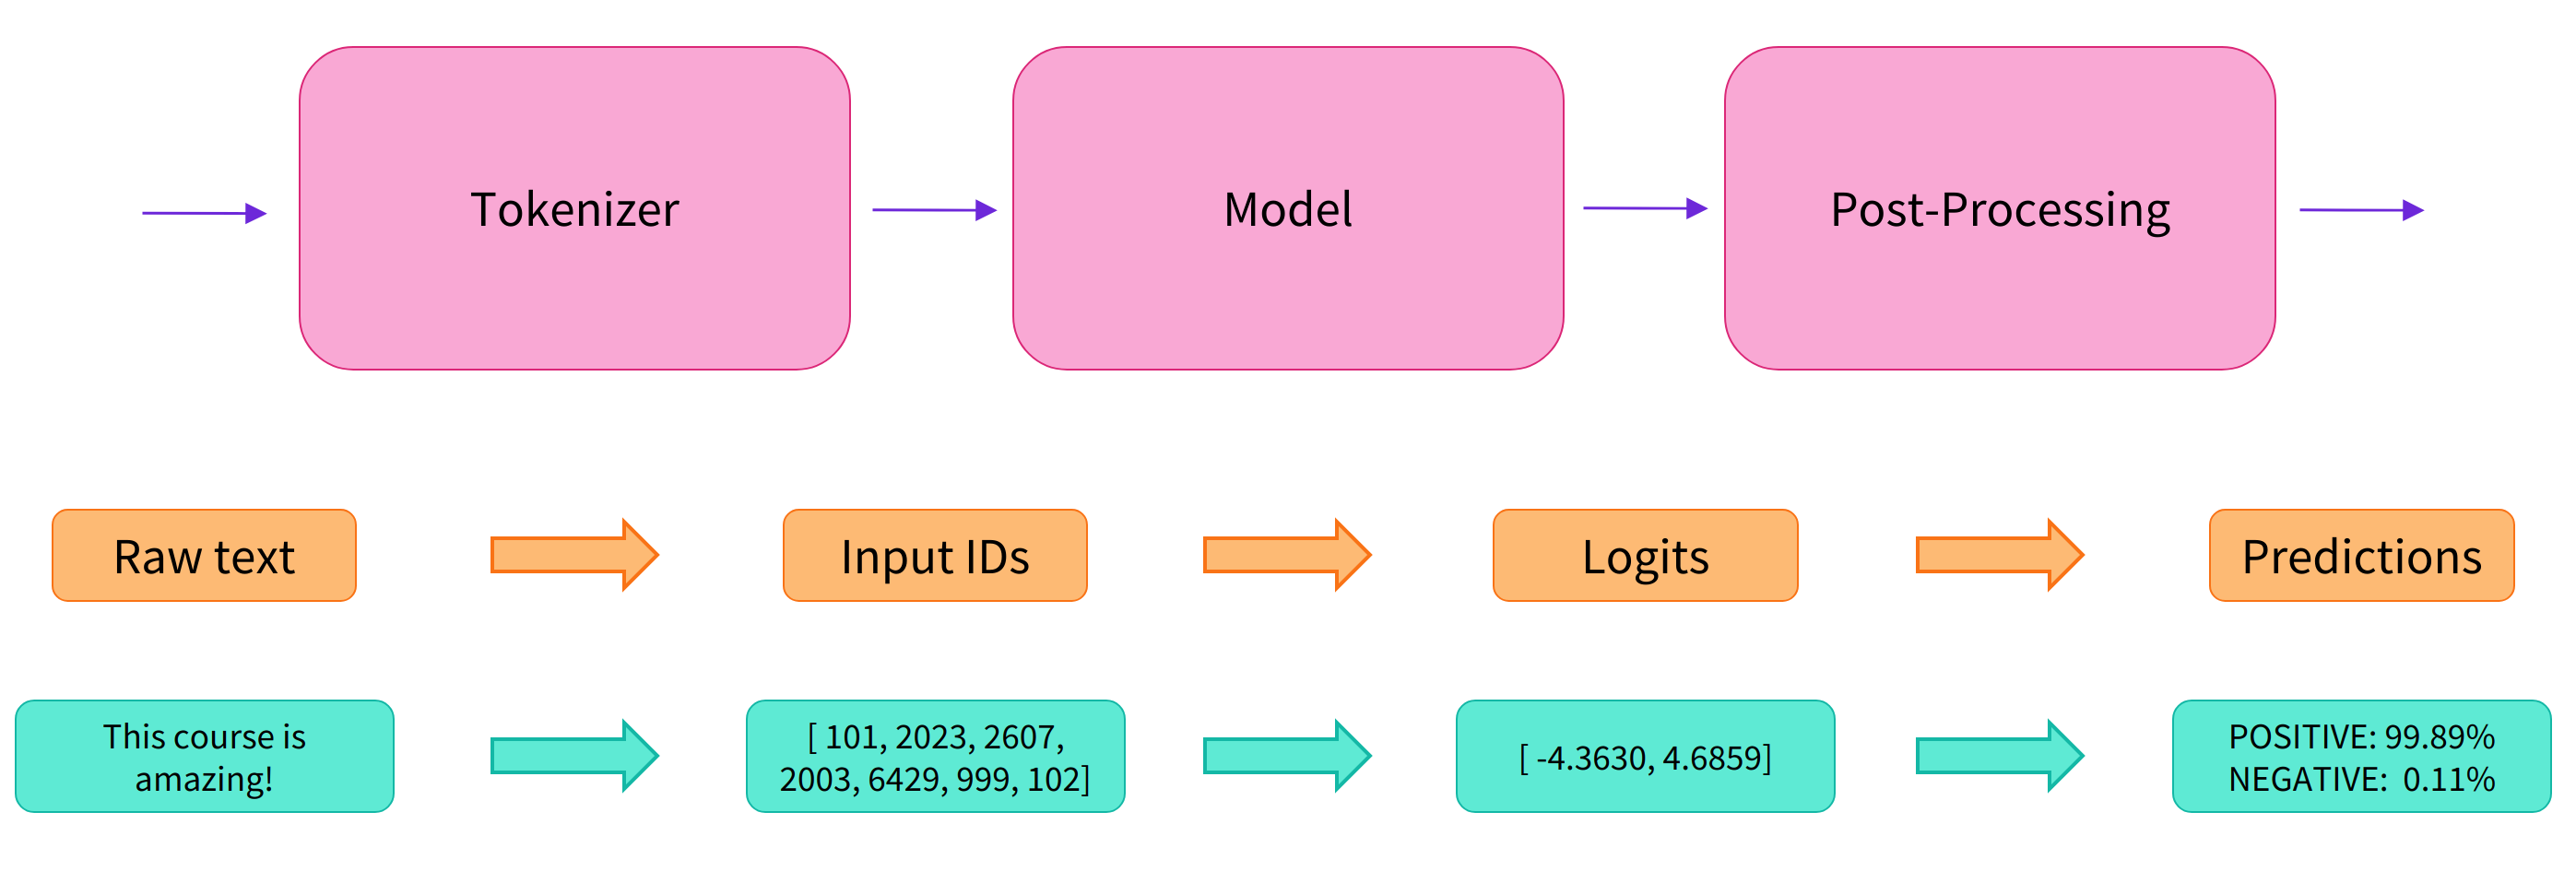

# Pipeline 分类
+ pipeline()，它是封装所有其他pipelines的最强大的对象
+ 针对特定任务pipelines，适用于音频、计算机视觉、自然语言处理和多模态任务。

# Pipeline 支持任务类型

> 可以通过以下代码进行

In [2]:
from transformers.pipelines import SUPPORTED_TASKS
for k,v in SUPPORTED_TASKS.items():
    print(k,v["type"])

audio-classification audio
automatic-speech-recognition multimodal
text-to-audio text
feature-extraction multimodal
text-classification text
token-classification text
question-answering text
table-question-answering text
visual-question-answering multimodal
document-question-answering multimodal
fill-mask text
summarization text
translation text
text2text-generation text
text-generation text
zero-shot-classification text
zero-shot-image-classification multimodal
zero-shot-audio-classification multimodal
conversational text
image-classification image
image-feature-extraction image
image-segmentation multimodal
image-to-text multimodal
object-detection multimodal
zero-shot-object-detection multimodal
depth-estimation image
video-classification video
mask-generation multimodal
image-to-image image


# Pipeline 创建与使用
> 根据任务类型直接创建Pipeline,默认都是英文的模型

In [2]:
from transformers import pipeline
pipe = pipeline("text-classification")
pipe(["This restaurant is awesome"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998743534088135}]

# 第二种方式
如果您想使用 hub 上的特定模型，可以忽略任务，如果hub上的模型已经定义了该任务：

In [1]:
pipe = pipeline(model="FacebookAI/roberta-large-mnli") #  默认保存在 ~/.cache/huggingface/hub
pipe("This restaurant is awesome")

NameError: name 'pipeline' is not defined

# 第三种方式
指定任务类型，再指定模型，创建基于指定模型的Pipeline

In [3]:
# https://huggingface.co/models
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [4]:
pipe("我觉得我很帅")

[{'label': 'positive (stars 4 and 5)', 'score': 0.9132874011993408}]

# 第四种方式
预先加载模型，再创建Pipeline,这种方式，必须同时指定model和tokenizer

In [6]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

NameError: name 'AutoModelForSequenceClassification' is not defined

In [ ]:
pipe("你是真的很帅气")

# pipeline 默认使用的是CPU

In [7]:
pipe.model.device

device(type='cpu')

## 使用GPU进行推理

In [ ]:
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese", device=0)
pipe.model.device

# 确定Pipeline参数

In [8]:
from transformers.pipelines.text_classification import TextClassificationPipeline


transformers.pipelines.text_classification.TextClassificationPipeline

In [10]:
TextClassificationPipeline # 使用shift+tab查看注释 重点看call方法

transformers.pipelines.text_classification.TextClassificationPipeline

# Pipeline 图片识别

In [13]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


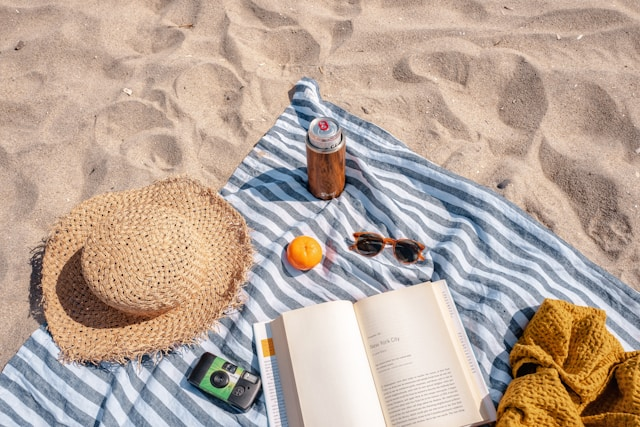

In [16]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
im = Image.open(requests.get(url, stream=True).raw)
im

In [17]:
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book"],
)
predictions

[{'score': 0.25451353192329407,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 429, 'ymax': 265}},
 {'score': 0.18389177322387695,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 502, 'ymax': 427}},
 {'score': 0.11029064655303955,
  'label': 'hat',
  'box': {'xmin': 38, 'ymin': 173, 'xmax': 259, 'ymax': 363}}]

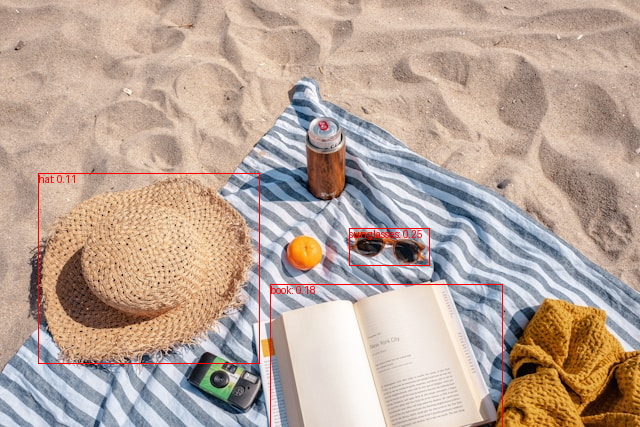

In [18]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im

# Pipeline背后的实现

## 1使用分词器进行预处理
因为神经网络模型无法直接处理文本，因此首先需要通过预处理环节将文本转换为模型可以理解的数字。具体地，我们会使用每个模型对应的分词器 (tokenizer) 来进行：

将输入切分为词语、子词或者符号（例如标点符号），统称为 tokens；
根据模型的词表将每个 token 映射到对应的 token 编号（就是一个数字）；
根据模型的需要，添加一些额外的输入。
我们对输入文本的预处理需要与模型自身预训练时的操作完全一致，只有这样模型才可以正常地工作。注意，每个模型都有特定的预处理操作，如果对要使用的模型不熟悉，可以通过 Model Hub 查询。这里我们使用 AutoTokenizer 类和它的 from_pretrained() 函数，它可以自动根据模型 checkpoint 名称来获取对应的分词器。

情感分析 pipeline 的默认 checkpoint 是 distilbert-base-uncased-finetuned-sst-2-english，下面我们手工下载并调用其分词器：

In [19]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


可以看到，输出中包含两个键 input_ids 和 attention_mask，其中 input_ids 对应分词之后的 tokens 映射到的数字编号列表，而 attention_mask 则是用来标记哪些 tokens 是被填充的（这里“1”表示是原文，“0”表示是填充字符）。
先不要关注 padding、truncation 这些参数，以及 attention_mask 项，后面我们会详细介绍:)。


# 2.将预处理好的输入送入模型
预训练模型的下载方式和分词器 (tokenizer) 类似，Transformers 包提供了一个 AutoModel 类和对应的 from_pretrained() 函数。下面我们手工下载这个 distilbert-base 模型：

In [20]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

预训练模型的本体只包含基础的 Transformer 模块，对于给定的输入，它会输出一些神经元的值，称为 hidden states 或者特征 (features)。对于 NLP 模型来说，可以理解为是文本的高维语义表示。这些 hidden states 通常会被输入到其他的模型部分（称为 head），以完成特定的任务，例如送入到分类头中完成文本分类任务。

其实前面我们举例的所有 pipelines 都具有类似的模型结构，只是模型的最后一部分会使用不同的 head 以完成对应的任务。

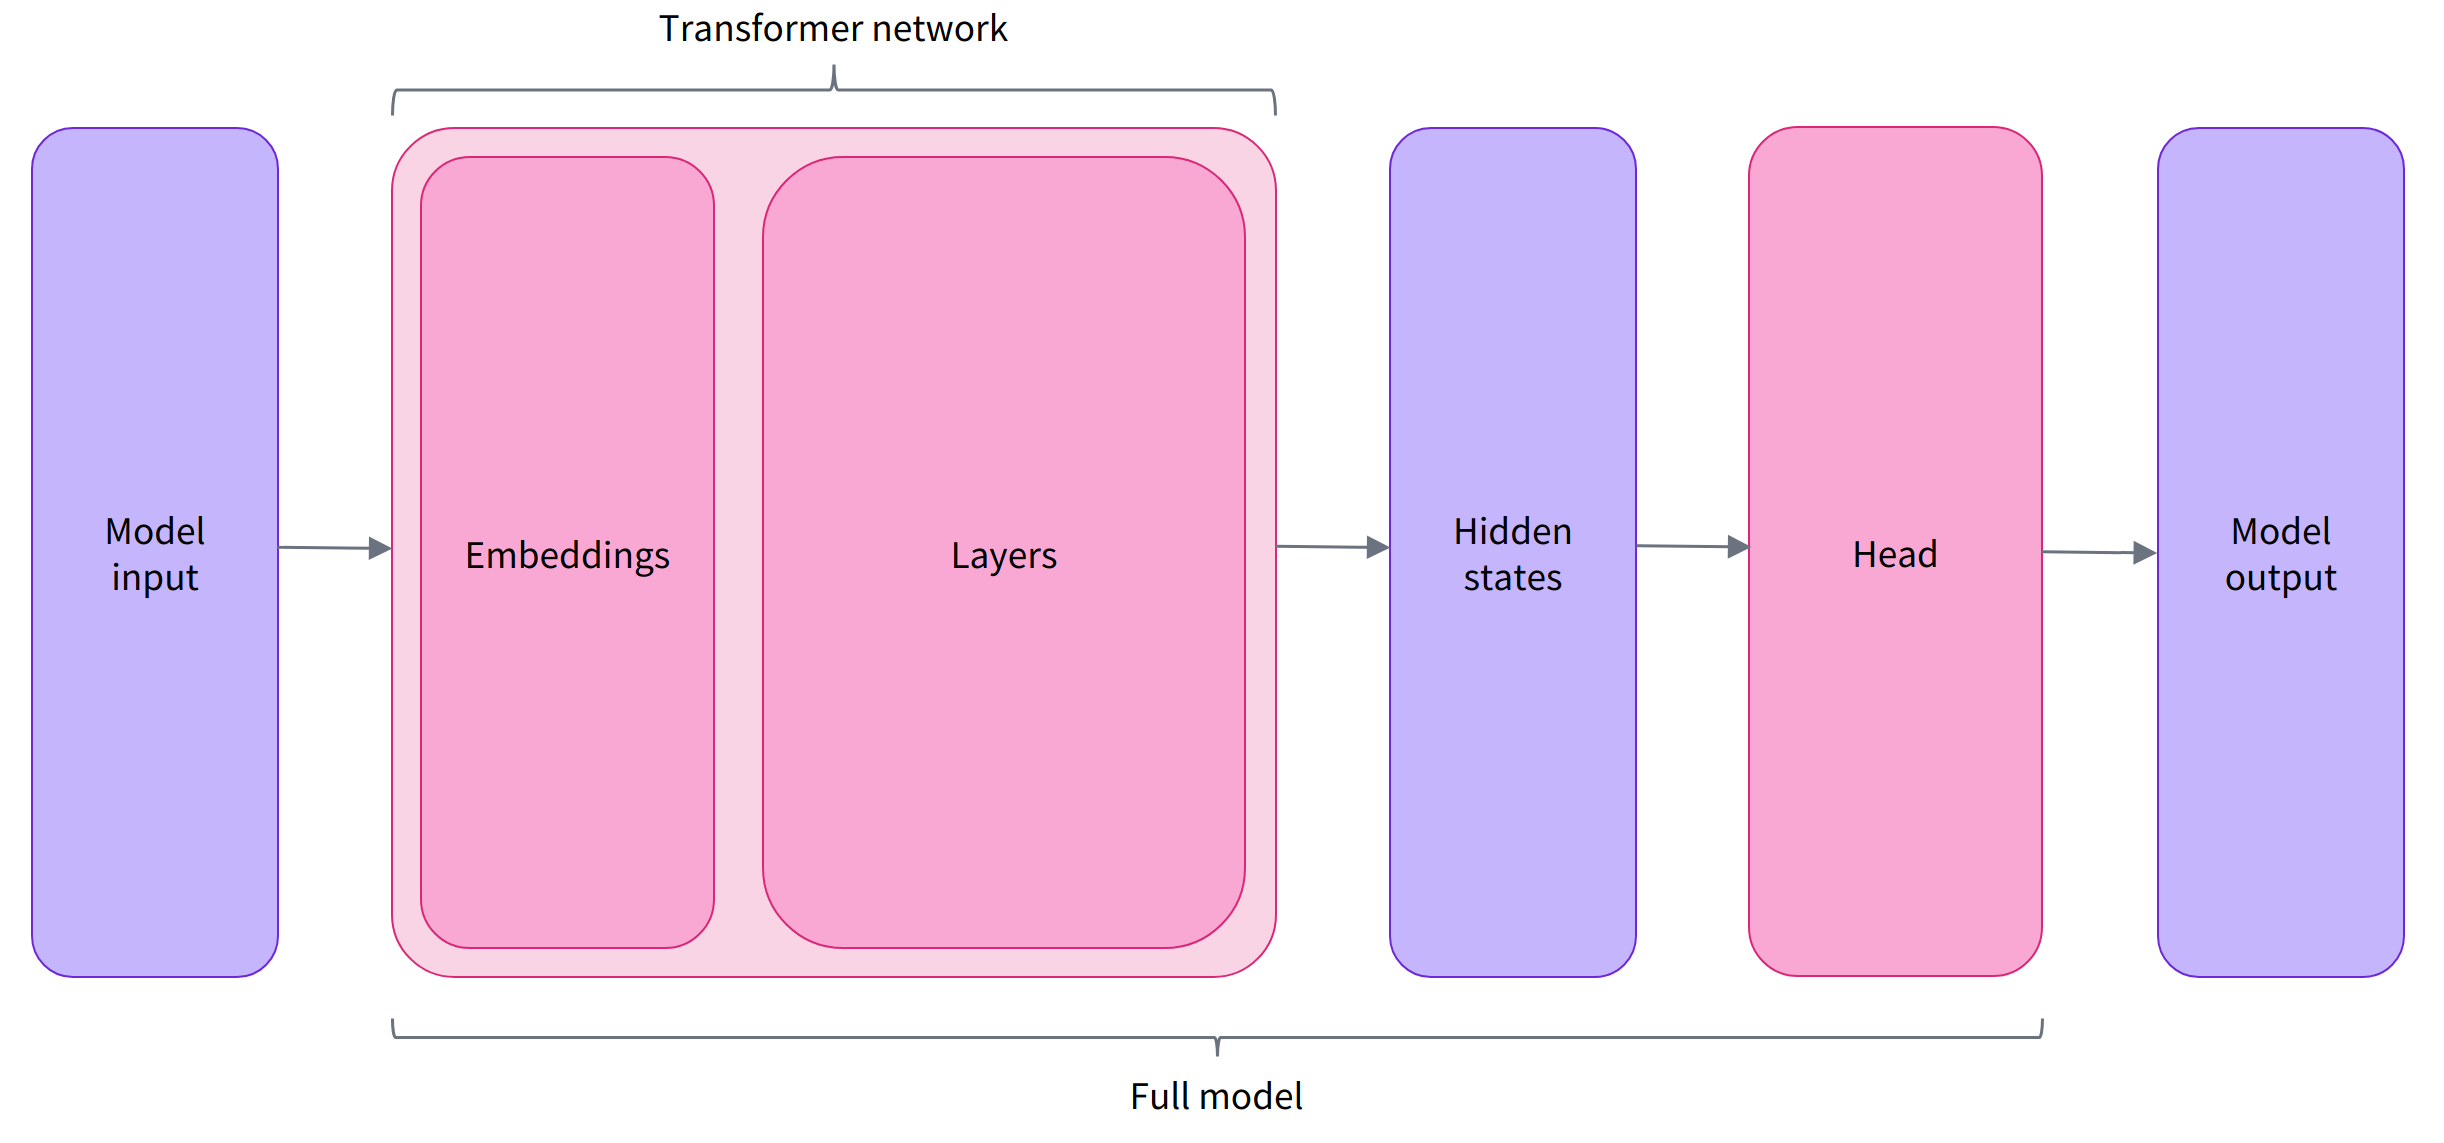
Transformers 库封装了很多不同的结构，常见的有：

*Model （返回 hidden states）
*ForCausalLM （用于条件语言模型）
*ForMaskedLM （用于遮盖语言模型）
*ForMultipleChoice （用于多选任务）
*ForQuestionAnswering （用于自动问答任务）
*ForSequenceClassification （用于文本分类任务）
*ForTokenClassification （用于 token 分类任务，例如 NER）

Transformer 模块的输出是一个维度为 (Batch size, Sequence length, Hidden size) 的三维张量，其中 Batch size 表示每次输入的样本（文本序列）数量，即每次输入多少个句子，上例中为 2；Sequence length 表示文本序列的长度，即每个句子被分为多少个 token，上例中为 16；Hidden size 表示每一个 token 经过模型编码后的输出向量（语义表示）的维度。

预训练模型编码后的输出向量的维度通常都很大，例如 Bert 模型 base 版本的输出为 768 维，一些大模型的输出维度为 3072 甚至更高。

我们可以打印出这里使用的 distilbert-base 模型的输出维度：


In [21]:
from transformers import AutoTokenizer, AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModel.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)


torch.Size([2, 16, 768])


Transformers 模型的输出格式类似 namedtuple 或字典，可以像上面那样通过属性访问，也可以通过键（outputs["last_hidden_state"]），甚至索引访问（outputs[0]）。

对于情感分析任务，很明显我们最后需要使用的是一个文本分类 head。因此，实际上我们不会使用 AutoModel 类，而是使用 AutoModelForSequenceClassification：



In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
outputs = model(**inputs)
print(outputs.logits.shape)

torch.Size([2, 2])


可以看到，对于 batch 中的每一个样本，模型都会输出一个两维的向量（每一维对应一个标签，positive 或 negative）。



## 3 对模型输出进行后处理
由于模型的输出只是一些数值，因此并不适合人类阅读。例如我们打印出上面例子的输出

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
outputs = model(**inputs)
print(outputs.logits)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


模型对第一个句子输出 
，对第二个句子输出 
，它们并不是概率值，而是模型最后一层输出的 logits 值。要将他们转换为概率值，还需要让它们经过一个 SoftMax 层，例如：

In [24]:
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


所有 Transformers 模型都会输出 logits 值，因为训练时的损失函数通常会自动结合激活函数（例如 SoftMax）与实际的损失函数（例如交叉熵 cross entropy）。

这样模型的预测结果就是容易理解的概率值：第一个句子 
，第二个句子 
。最后，为了得到对应的标签，可以读取模型 config 中提供的 id2label 属性：

In [25]:
print(model.config.id2label)

{0: 'NEGATIVE', 1: 'POSITIVE'}


于是我们可以得到最终的预测结果：

第一个句子: NEGATIVE: 0.0402, POSITIVE: 0.9598
第二个句子: NEGATIVE: 0.9995, POSITIVE: 0.0005